<a href="https://colab.research.google.com/github/ogunjosam/COVID19_WESTAF_WG3/blob/main/WG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


tmpc
relh
drct
sped


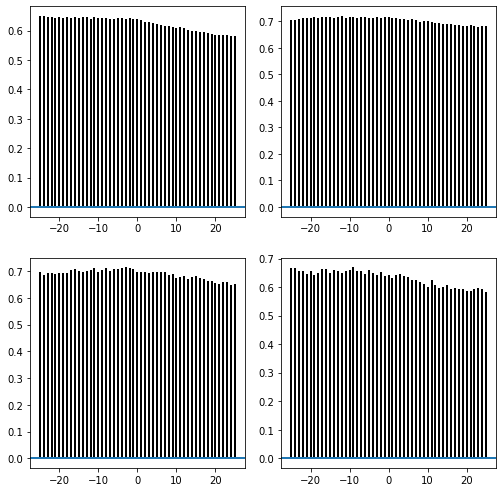

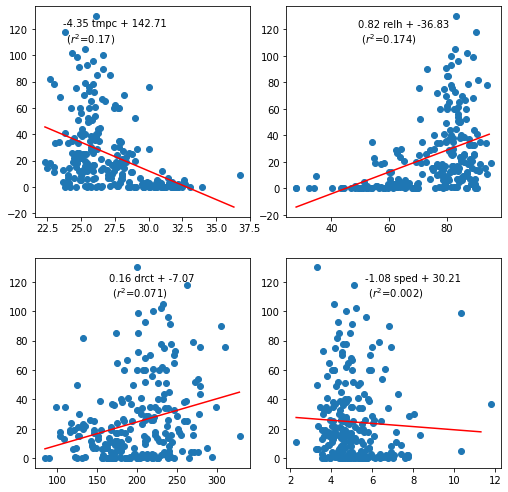

In [1]:
'''
This is a working document for members of WG3.  
 
Please be careful with deleting.
 
Be generous with comments so everyone can follow
 
'''
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.metrics import r2_score
 
# import purpleair data from my github repository
xx = pd.read_csv('https://raw.githubusercontent.com/ogunjosam/COVID19_WESTAF_WG3/main/Abj_weather.csv', parse_dates=['valid'],usecols=[1,2,3,4,5],index_col=['valid'], dayfirst=True)
xx= xx[list(xx)[0:]].apply(pd.to_numeric, errors='coerce').resample('D').mean()

# import COVID19 data for Abuja for the same time period.
xy = pd.read_csv('https://raw.githubusercontent.com/ogunjosam/COVID19_WESTAF_WG3/main/Abj_covid19.csv',parse_dates=['Date'],dayfirst=True)

'''
fig, axes = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(top=0.12, bottom=0.08, left=0.10, right=0.15, hspace=1.0,wspace=0.0)
plt.tight_layout(h_pad=2,w_pad=2)
axf = axes.flatten()

k = 0
for i in list(xx)[0:]:
  axf[k].plot(xy['New cases'],xx[i],'.')
  axf[k].text(100,xx[i].max(),i)
  model = np.polyfit(xy['New cases'],xx[i],1)
  print(model)
  k = k + 1
'''

# print the data to see how it looks like
xc = xy['New cases'].to_numpy()
xx['covid19'] = xc
xx = xx.dropna()

# plot the cross correlation graph to determine if there is lag between the data
fig2, ax2 = plt.subplots(2,2, figsize=(7,7))
fig2.subplots_adjust(top=0.12, bottom=0.08, left=0.10, right=0.15, hspace=1.0,wspace=0.0)
plt.tight_layout(h_pad=2,w_pad=2)
axf1 = ax2.flatten()
k1 = 0
for j in list(xx)[0:-1]:
  axf1[k1].xcorr(xx[j],xx['covid19'], usevlines=True, maxlags=25, lw=2)
  k1 = k1 + 1

# plot the scatter plot and regression lines.
fig3, ax3 = plt.subplots(2,2, figsize=(7,7))
fig3.subplots_adjust(top=0.12, bottom=0.08, left=0.10, right=0.15, hspace=1.0,wspace=0.0)
plt.tight_layout(h_pad=2,w_pad=2)
axf3 = ax3.flatten()
jk = 0
for jj in list(xx)[0:-1]:
  axf3[jk].scatter(xx[jj],xx['covid19'])
  #axf3[jk].text(xx[jj].max()-3,120,jj)
  model = np.polyfit(xx[jj],xx['covid19'],1)
  xlin = np.arange(xx[jj].min(),xx[jj].max())
  predict = np.poly1d(model)
  ylin = predict(xlin)
  r2 = r2_score(xx['covid19'],predict(xx[jj]))
  axf3[jk].plot(xlin,ylin, c='r')
  axf3[jk].text((xx[jj].max()+xx[jj].min())/2.5,110,'{} {} + {} \n ($r^2$={})'.format(np.round(model[0],2),jj,np.round(model[1],2),np.round(r2,3)))
  jk = jk + 1

for kk in list(xx)[0:-1]:
  gct = grangercausalitytests(xx[['covid19',kk]], 2,addconst = True, verbose=False)
  print(kk)
